In [1]:
#Importing the Essential libraries and their Functions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
import sklearn
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [3]:
from sklearn.naive_bayes import GaussianNB

In [4]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [5]:
Data_Path = pd.read_csv("C:/Users/HP/Desktop/LinkedIn/Apziva/Projects/Happy Customers Project (Project 1)/ACME-HappinessSurvey2020.csv")

print(Data_Path)

     Y  X1  X2  X3  X4  X5  X6
0    0   3   3   3   4   2   4
1    0   3   2   3   5   4   3
2    1   5   3   3   3   3   5
3    0   5   4   3   3   3   5
4    0   5   4   3   3   3   5
..  ..  ..  ..  ..  ..  ..  ..
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5

[126 rows x 7 columns]


#EDA

In [6]:
Data_Path.head(10)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
5,1,5,5,3,5,5,5
6,0,3,1,2,2,1,3
7,1,5,4,4,4,4,5
8,0,4,1,4,4,4,4
9,0,4,4,4,2,5,5


In [7]:
Data_Path.tail(10)

,Y,X1,X2,X3,X4,X5,X6
116,1,3,4,4,5,1,3
117,1,5,1,5,5,5,5
118,1,4,3,3,4,4,4
119,1,5,5,1,1,5,1
120,0,4,4,4,4,1,3
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5
125,0,5,3,2,5,5,5


In [8]:
Data_Path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [9]:
Data_Path.describe

<bound method NDFrame.describe of      Y  X1  X2  X3  X4  X5  X6
0    0   3   3   3   4   2   4
1    0   3   2   3   5   4   3
2    1   5   3   3   3   3   5
3    0   5   4   3   3   3   5
4    0   5   4   3   3   3   5
..  ..  ..  ..  ..  ..  ..  ..
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5

[126 rows x 7 columns]>

#Correlation Cofficient

In [10]:
Data_Path.corr()

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


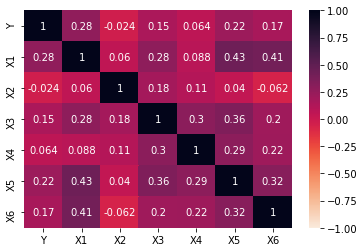

In [11]:
sns.heatmap(Data_Path.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

In [12]:
Data_Path.drop(['X3', 'X4'], axis=1, inplace=True)

In [13]:
Data_Path

,Y,X1,X2,X5,X6
0,0,3,3,2,4
1,0,3,2,4,3
2,1,5,3,3,5
3,0,5,4,3,5
4,0,5,4,3,5
...,...,...,...,...,...
121,1,5,2,4,3
122,1,5,2,2,5
123,1,5,3,4,5
124,0,4,3,4,5


In [14]:
Data_Path.corr()

,Y,X1,X2,X5,X6
Y,1.000000,0.280160,-0.024274,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.039996,-0.062205
X5,0.224522,0.432772,0.039996,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.320195,1.000000


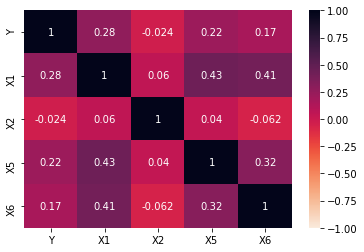

In [15]:
sns.heatmap(Data_Path.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

In [16]:
Data_Path.drop(['X2'], axis=1, inplace=True)

In [17]:
Data_Path

,Y,X1,X5,X6
0,0,3,2,4
1,0,3,4,3
2,1,5,3,5
3,0,5,3,5
4,0,5,3,5
...,...,...,...,...
121,1,5,4,3
122,1,5,2,5
123,1,5,4,5
124,0,4,4,5


In [18]:
Data_Path.corr()

,Y,X1,X5,X6
Y,1.000000,0.280160,0.224522,0.167669
X1,0.280160,1.000000,0.432772,0.411873
X5,0.224522,0.432772,1.000000,0.320195
X6,0.167669,0.411873,0.320195,1.000000


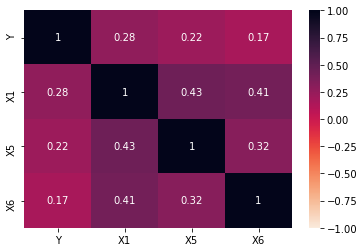

In [19]:
sns.heatmap(Data_Path.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

In [20]:
Data_Path.drop(['X5'], axis=1, inplace=True)

In [21]:
Data_Path

,Y,X1,X6
0,0,3,4
1,0,3,3
2,1,5,5
3,0,5,5
4,0,5,5
...,...,...,...
121,1,5,3
122,1,5,5
123,1,5,5
124,0,4,5


In [22]:
Data_Path.corr()

,Y,X1,X6
Y,1.000000,0.280160,0.167669
X1,0.280160,1.000000,0.411873
X6,0.167669,0.411873,1.000000


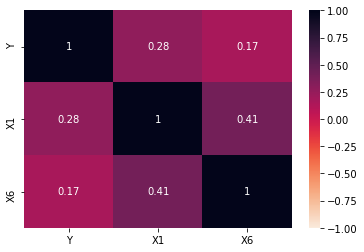

In [23]:
sns.heatmap(Data_Path.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

In [24]:
Data_Path.drop(['X1'], axis=1, inplace=True)

In [25]:
Data_Path

,Y,X6
0,0,4
1,0,3
2,1,5
3,0,5
4,0,5
...,...,...
121,1,3
122,1,5
123,1,5
124,0,5


In [26]:
Data_Path.corr()

,Y,X6
Y,1.000000,0.167669
X6,0.167669,1.000000


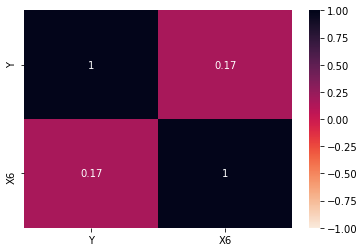

In [27]:
sns.heatmap(Data_Path.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

#Data Splitting & Labeling

In [28]:
DataLabeling = Data_Path.values
x = DataLabeling[:, 1:2] 
y = Data_Path['Y']

trainX, testX, trainY, testY = train_test_split(x, y, test_size= 0.2, random_state = 6)

In [29]:
trainX.shape

(100, 1)

In [30]:
trainY.shape

(100,)

In [31]:
testX.shape

(26, 1)

In [32]:
testY.shape

(26,)

# Naive Bayes Algorithm

In [33]:
#Building the Naive Bayes Algorithm

NaiveBayes_Model = GaussianNB()

NaiveBayes_Model.fit(trainX, trainY)

NaiveBayes_prediction = NaiveBayes_Model.predict(testX)

In [37]:
#Calculating the results for Training the Algorithm in aspects of Accuracy, F1 Score, Precision Score, Recall Score


print("Accuracy", accuracy_score(testY, NaiveBayes_prediction))
print("F1 Score", f1_score(testY, NaiveBayes_prediction))
print("Precision Score", precision_score(testY, NaiveBayes_prediction))
print("recall Score", recall_score(testY, NaiveBayes_prediction))

Accuracy 0.5
F1 Score 0.6285714285714286
Precision Score 0.6875
recall Score 0.5789473684210527


In [40]:
confusion_matrix(testY, NaiveBayes_prediction)

array([[ 2,  5],
       [ 8, 11]], dtype=int64)

<AxesSubplot:>

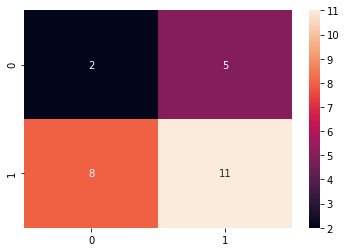

In [41]:
#Visualizing the Confusion Matrix

sns.heatmap(confusion_matrix(testY, NaiveBayes_prediction),annot=True)

# SVM Algorithm

In [42]:
#Building the SVM Algorithm

classifer = svm.SVC()

In [43]:
#Training the SVM Algorithm

classifer.fit(trainX, trainY)

SVC()

In [44]:
SVM_prediction = classifer.predict(testX)

In [45]:
#Calculating the results for Training the Algorithm in aspects of Accuracy, F1 Score, Precision Score, Recall Score

print("Accuracy", accuracy_score(testY, SVM_prediction))
print("F1 Score", f1_score(testY, SVM_prediction))
print("precision Score", precision_score(testY, SVM_prediction))
print("recall Score", recall_score(testY, SVM_prediction))

Accuracy 0.7307692307692307
F1 Score 0.8372093023255814
precision Score 0.75
recall Score 0.9473684210526315


In [46]:
confusion_matrix(testY, SVM_prediction)

array([[ 1,  6],
       [ 1, 18]], dtype=int64)

<AxesSubplot:>

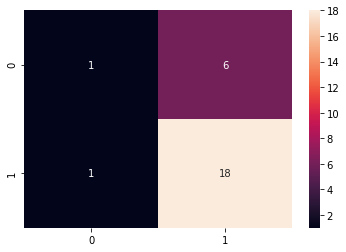

In [47]:
#Visualizing the Confusion Matrix

sns.heatmap(confusion_matrix(testY, SVM_prediction),annot=True)

#Findings:

#Based on Data Description, it tells that X6 is the most Attribute that is associated with the Answer (Attribute Y).
#During Training the Dataset while keeping only X6, it produced the highest Accuracy so far (73%).

#Based on my Finding, my opinion is that X1 supposed to get the highest Accuracy; since it has the highest precents in the Correlation Cofficient Analysis

In [48]:
#re-visualizing the Correlation Cofficient for the Original Data

In [49]:
Data_Path = pd.read_csv("C:/Users/HP/Desktop/LinkedIn/Apziva/Projects/Happy Customers Project (Project 1)/ACME-HappinessSurvey2020.csv")

print(Data_Path)

     Y  X1  X2  X3  X4  X5  X6
0    0   3   3   3   4   2   4
1    0   3   2   3   5   4   3
2    1   5   3   3   3   3   5
3    0   5   4   3   3   3   5
4    0   5   4   3   3   3   5
..  ..  ..  ..  ..  ..  ..  ..
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5

[126 rows x 7 columns]


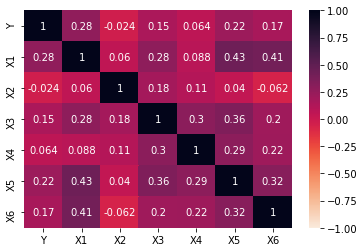

In [51]:
sns.heatmap(Data_Path.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

#As you can see; for X1, its more associated with the target Y and also for the rest of other Attributes (X2 to X6). 

#Logically, X5 & X6 (Specifically X6) are more Associated to the determined answer Y.
#Statistically, X1 has the most Associate result for the target Attribute Y.